In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
%matplotlib inline

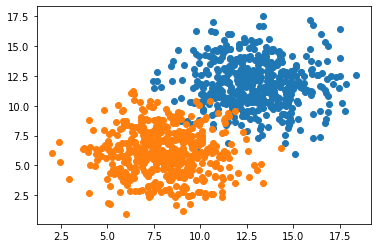

In [7]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T
 
X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T
 
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])

In [21]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = Adam(lr=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=100, shuffle='true')

Epoch 1/100
20/20 [==============================] - 0s 1ms/step - loss: 1.9699 - accuracy: 0.5410
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.6133 - accuracy: 0.6930
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.8090
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3901 - accuracy: 0.8630
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3471 - accuracy: 0.9040
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3095 - accuracy: 0.9230
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.9260
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2644 - accuracy: 0.9490
Epoch 9/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2398 - accuracy: 0.9540
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.9620
Epoch 11/

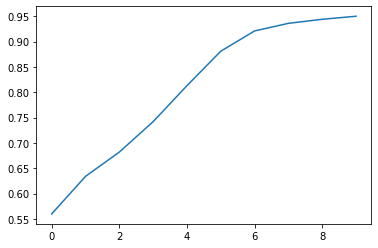

In [15]:
plt.plot(h.history['accuracy'])

In [0]:
def plot_decision_boundary(X, y, model):
  x_span = np.linspace(min(X[:,0]) -1, max(X[:,0]) +1)
  y_span = np.linspace(min(X[:,1]) -1, max(X[:,1]) +1)
  xx, yy = np.meshgrid(x_span, y_span)
  xx_, yy_ = xx.ravel(), yy.ravel()
  grid = np.c_[xx_, yy_]
  preds = model.predict(grid)
  z = preds.reshape(xx.shape)
  plt.contourf(xx, yy, z)

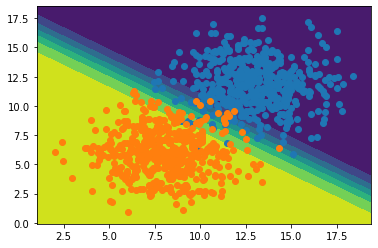

In [23]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts,0], X[:n_pts,1])
plt.scatter(X[n_pts:,0], X[n_pts:,1])